In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

In [29]:
random_state = 20
threshold = 3

In [30]:
df = pd.read_csv("test_data/S Parameter Plot 2.csv")

In [31]:
# df.drop(columns=["Freq [GHz]"], inplace=True)

In [32]:
df

,Pad_L [cm],Pad_W [cm],Freq [GHz],"dB(S(1,1)) []"
0,0.35,0.4,2.00,-0.039230
1,0.35,0.4,2.18,-0.053142
2,0.35,0.4,2.36,-0.067467
3,0.35,0.4,2.54,-0.082482
4,0.35,0.4,2.72,-0.098518
...,...,...,...,...
904,0.45,0.8,19.28,-5.728851
905,0.45,0.8,19.46,-6.172101
906,0.45,0.8,19.64,-7.396826
907,0.45,0.8,19.82,-7.555971


<Axes: xlabel='Freq [GHz]'>

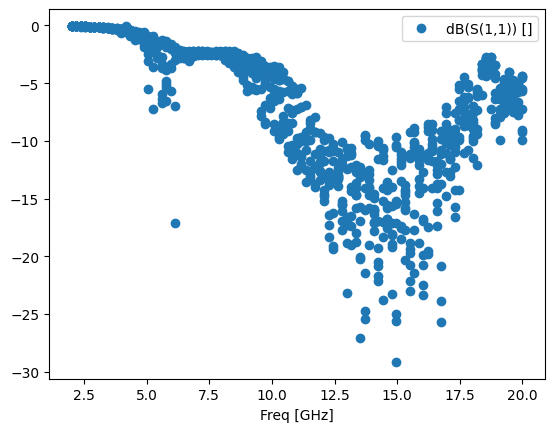

In [33]:
df.plot(x=df.columns[2], y=df.columns[3], style='o')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df[['Pad_L [cm]', 'Pad_W [cm]']], df[['dB(S(1,1)) []']], random_state=random_state)

In [35]:
clf_dt = DecisionTreeRegressor(random_state=random_state)
clf_dt = clf_dt.fit(X_train, y_train)

In [36]:

predictions = clf_dt.predict(X_test)


In [37]:
results = X_test.copy()

In [38]:
# results['y_test'] = y_test
# results['predictions'] = predictions

In [39]:
results

,Pad_L [cm],Pad_W [cm]
376,0.35,0.6
798,0.40,0.8
783,0.40,0.8
120,0.40,0.4
580,0.45,0.6
...,...,...
171,0.40,0.4
45,0.35,0.4
57,0.35,0.4
140,0.40,0.4


In [40]:
# Check if predicted value is threshold amount above or below actual value
def is_in_threshold(actual, pred):
    return pred <= actual + threshold and pred >= actual - threshold

In [41]:
def create_tf_column(results):
    return results.apply(lambda x: is_in_threshold(x['y_test'], x['predictions']), axis=1)

In [42]:
def get_score(X_test, y_test, predictions, clf_dt):
    predictions = clf_dt.predict(X_test)
    dataframe = X_test.copy()
    dataframe['y_test'] = y_test
    dataframe['predictions'] = predictions
    return create_tf_column(dataframe).value_counts().get(True) / dataframe.shape[0]

In [43]:
get_score(X_test, y_test, predictions, clf_dt)

0.2236842105263158

In [44]:

path = clf_dt.cost_complexity_pruning_path(X_train, y_train)

In [45]:
path

{'ccp_alphas': array([0.00000000e+00, 3.31342775e-09, 8.27481244e-04, 2.66368200e-03,
        1.37134132e-02, 1.47913789e-02, 3.62592491e-02, 6.43875124e-02,
        1.13561002e-01]),
 'impurities': array([35.71693406, 35.71693406, 35.71776154, 35.72042523, 35.73413864,
        35.74893002, 35.78518927, 35.84957678, 35.96313778])}

In [46]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [47]:
ccp_alphas

array([0.00000000e+00, 3.31342775e-09, 8.27481244e-04, 2.66368200e-03,
       1.37134132e-02, 1.47913789e-02, 3.62592491e-02, 6.43875124e-02])

In [51]:
ccp_alphas = np.linspace(0,6.43875124e-02,50)

In [52]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(random_state=random_state, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [53]:
# train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [get_score(X_test, y_test, predictions, clf_dt) for clf_dt in clf_dts]

In [54]:
test_scores

[0.2236842105263158,
 0.2236842105263158,
 0.2236842105263158,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.2236842105263158,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561403508,
 0.21929824561

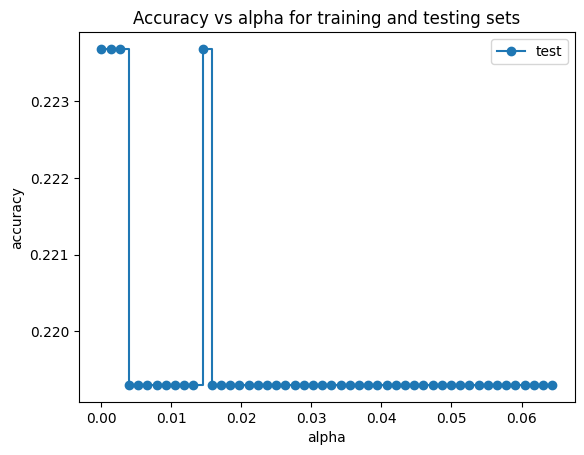

In [55]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()
